## Project Three: Three Body System

Initial Condition
    1. Two Stationary Stars and One Body Introduced
        init_state: Star1_p = (-100, 0) v = (0, 0)
                    Star2_p = (100, 0)  v = (0, 0)
                    Planet_p = (50, 50) v = (0, -50) 
                    
        
    2. Two Stationary Stars and Two Bodies Introduced with pretty much the same condition(chaos)
    
    3. Binary Star System with Two Bodies Introduced
    
    Mass of Sun: 2 * 10^30 kg (2 kg)
    Mass of Earth: 6 * 10^24 kg (.02kg)
    G constant: 6.67*10^-11
    
   
    binary star orbits: https://en.wikipedia.org/wiki/Habitability_of_binary_star_systems
    wired article: https://www.wired.com/2016/06/way-solve-three-body-problem/
    

In [1]:
%matplotlib notebook
from modsim import *

In [2]:
m = UNITS.meter
s = UNITS.second
kg = UNITS.kilogram

In [3]:
condition = Condition(m_s1 = 2,
                      m_s2 = 2,
                      m_p1 = .02,
                      G = 100000,
                      duration = 10,
                      dt = 0.01)

In [4]:
def make_system(condition):
    """Make a system object.
    
    condition: Condition object with angle, velocity, x, y,
               diameter, duration, g, mass, rho, and C_d
               
    returns: System object
    """
    unpack(condition)
    
    # make the initial state
    init = State(x_s1=-100, y_s1=0, x_s2=100, y_s2=0, x_p1=50, y_p1=50, vx_s1=0, vy_s1=0, vx_s2=0, vy_s2=0, vx_p1=0, vy_p1=-50)
    
    # compute timestamps
    ts = linrange(0, duration, dt)
    
    return System(init=init, G = G, m_s1 = m_s1, m_s2 = m_s2, m_p1 = m_p1, ts=ts, dt = dt)

In [5]:
system = make_system(condition)

In [6]:
def slope_func_1(state, t, system):
    """Compute derivatives of the state.
    
    state: position, velocity
 n  m    t: time
    system: System object containing g, rho,
            C_d, area, and mass
    
    returns: derivatives of y and v
    """
    x_s1, y_s1, x_s2, y_s2, x_p1, y_p1, vx_s1, vy_s1, vx_s2, vy_s2, vx_p1, vy_p1 = state
    unpack(system)
    
    pos_p1 = Vector(x_p1, y_p1)
    v_p1 = Vector(vx_p1, vy_p1)
    pos_s1 = Vector(x_s1, y_s1)
    pos_s2 = Vector(x_s2, y_s2)
    
    distance_p1s1 = pos_s1 - pos_p1
    distance_p1s2 = pos_s2 - pos_p1
    
    F_p1s1 = (G * m_s1 * m_p1 / (distance_p1s1.mag**2)) * distance_p1s1.hat()
    F_p1s2 = (G * m_s2 * m_p1 / (distance_p1s2.mag**2)) * distance_p1s2.hat()
    
    a_p1s1 = F_p1s1 / m_p1
    a_p1s2 = F_p1s2 / m_p1
    a = a_p1s1 + a_p1s2
    print(a)
    a = Vector(a)
    print(type(a))
    
    p_present = v_p1 * m_p1
    p_p1s1 = F_p1s1 * dt
    p_p1s2 = F_p1s2 * dt 
    p_total = p_present+p_p1s1+p_p1s2
    
    v_p1 = p_total / m_p1
    v_p1 = Vector(v_p1)
    
    #Use positions to find force acting on the planet, use the force to find momentum and acceleration, and then 
    #velocity from momentum. Return velocity and acceleration.
    
    return 0, 0, 0, 0, v_p1.x, v_p1.y, 0, 0, 0, 0, a.x, a.y

In [7]:
slope_func_1(system.init, 0, system)

[ 20.69480486 -30.81409338] dimensionless
<class 'modsim._Vector'>


(0,
 0,
 0,
 0,
 <Quantity(0.2069480486305779, 'dimensionless')>,
 <Quantity(-50.308140933755965, 'dimensionless')>,
 0,
 0,
 0,
 0,
 <Quantity(20.69480486305779, 'dimensionless')>,
 <Quantity(-30.814093375596602, 'dimensionless')>)

In [8]:
system = make_system(condition)
run_odeint(system, slope_func_1)

[ 20.69480486 -30.81409338] dimensionless
<class 'modsim._Vector'>
[ 20.69480486 -30.81409338] dimensionless
<class 'modsim._Vector'>
[ 20.69485324 -30.81410845] dimensionless
<class 'modsim._Vector'>
[ 20.69485324 -30.81410845] dimensionless
<class 'modsim._Vector'>
[ 20.69490163 -30.81412353] dimensionless
<class 'modsim._Vector'>
[ 20.69490163 -30.81412353] dimensionless
<class 'modsim._Vector'>
[ 20.73014015 -30.8250947 ] dimensionless
<class 'modsim._Vector'>
[ 20.73014015 -30.8250947 ] dimensionless
<class 'modsim._Vector'>
[ 20.76545357 -30.83606714] dimensionless
<class 'modsim._Vector'>
[ 20.76545358 -30.83606715] dimensionless
<class 'modsim._Vector'>
[ 20.80084208 -30.84704083] dimensionless
<class 'modsim._Vector'>
[ 20.80084209 -30.84704084] dimensionless
<class 'modsim._Vector'>
[ 20.97543329 -30.90085756] dimensionless
<class 'modsim._Vector'>
[ 20.97543338 -30.90085768] dimensionless
<class 'modsim._Vector'>
[ 20.92073929 -30.884056  ] dimensionless
<class 'modsim._Vect

<class 'modsim._Vector'>
[-79.22796955 -95.11414913] dimensionless
<class 'modsim._Vector'>
[-73.27644804 -95.48757566] dimensionless
<class 'modsim._Vector'>
[-73.2764472  -95.48757476] dimensionless
<class 'modsim._Vector'>
[-67.72026947 -95.7385724 ] dimensionless
<class 'modsim._Vector'>
[-67.72026879 -95.73857167] dimensionless
<class 'modsim._Vector'>
[-62.5156603  -95.89752107] dimensionless
<class 'modsim._Vector'>
[-62.51565977 -95.89752046] dimensionless
<class 'modsim._Vector'>
[-57.62312244 -95.98896895] dimensionless
<class 'modsim._Vector'>
[-57.62312207 -95.98896853] dimensionless
<class 'modsim._Vector'>
[-53.00698084 -96.03276368] dimensionless
<class 'modsim._Vector'>
[-53.00698057 -96.03276336] dimensionless
<class 'modsim._Vector'>
[-48.63494952 -96.04495206] dimensionless
<class 'modsim._Vector'>
[-48.63494931 -96.04495181] dimensionless
<class 'modsim._Vector'>
[-44.47772653 -96.03849482] dimensionless
<class 'modsim._Vector'>
[-44.47772637 -96.03849463] dimension

<class 'modsim._Vector'>
[ -282.02719435 -2410.40013814] dimensionless
<class 'modsim._Vector'>
[ -282.02719435 -2410.40013816] dimensionless
<class 'modsim._Vector'>
[ -228.32640086 -2452.7353696 ] dimensionless
<class 'modsim._Vector'>
[ -228.32640089 -2452.73536951] dimensionless
<class 'modsim._Vector'>
[ -172.20824163 -2495.24182905] dimensionless
<class 'modsim._Vector'>
[ -172.20824179 -2495.24182872] dimensionless
<class 'modsim._Vector'>
[ -113.55350156 -2537.89323935] dimensionless
<class 'modsim._Vector'>
[ -113.55350177 -2537.8932391 ] dimensionless
<class 'modsim._Vector'>
[  -52.23476217 -2580.66030254] dimensionless
<class 'modsim._Vector'>
[  -52.2347624  -2580.66030232] dimensionless
<class 'modsim._Vector'>
[   11.88436524 -2623.51035809] dimensionless
<class 'modsim._Vector'>
[   11.88436497 -2623.51035785] dimensionless
<class 'modsim._Vector'>
[   78.95009917 -2666.40699779] dimensionless
<class 'modsim._Vector'>
[   78.95009884 -2666.40699753] dimensionless
<class

[ 33563828.52731991  24394107.68179318] dimensionless
<class 'modsim._Vector'>
[ 36764341.00968148  26721791.57142647] dimensionless
<class 'modsim._Vector'>
[ 36764520.48145694  26721921.98263799] dimensionless
<class 'modsim._Vector'>
[ 40855428.04290006  29697177.16357804] dimensionless
<class 'modsim._Vector'>
[ 40856329.77085511  29697832.41790872] dimensionless
<class 'modsim._Vector'>
[ 39881777.16351861  28989055.43813898] dimensionless
<class 'modsim._Vector'>
[ 39882157.71884194  28989331.96925897] dimensionless
<class 'modsim._Vector'>
[ 43757334.04010817  31807688.76622712] dimensionless
<class 'modsim._Vector'>
[ 43757567.52119126  31807858.44702251] dimensionless
<class 'modsim._Vector'>
[ 48734752.33983597  35427689.83503163] dimensionless
<class 'modsim._Vector'>
[ 48735954.63606606  35428563.62183221] dimensionless
<class 'modsim._Vector'>
[ 47530895.8084318   34552142.96259342] dimensionless
<class 'modsim._Vector'>
[ 47531395.6593357   34552506.23078909] dimensionles

[  2.06165881e+17   1.49941328e+17] dimensionless
<class 'modsim._Vector'>
[  2.07596242e+17   1.50981609e+17] dimensionless
<class 'modsim._Vector'>
[  2.58140146e+17   1.87741424e+17] dimensionless
<class 'modsim._Vector'>
[  2.60455959e+17   1.89425682e+17] dimensionless
<class 'modsim._Vector'>
[  3.58889354e+17   2.61014800e+17] dimensionless
<class 'modsim._Vector'>
[  3.68968563e+17   2.68345255e+17] dimensionless
<class 'modsim._Vector'>
[  8.80656741e+17   6.40488341e+17] dimensionless
<class 'modsim._Vector'>
[  1.47673084e+18   1.07400402e+18] dimensionless
<class 'modsim._Vector'>
[  5.34422545e+18   3.88677429e+18] dimensionless
<class 'modsim._Vector'>
[  4.35901255e+17   3.17024394e+17] dimensionless
<class 'modsim._Vector'>
[  4.38900663e+17   3.19205815e+17] dimensionless
<class 'modsim._Vector'>
[  5.45621581e+17   3.96822324e+17] dimensionless
<class 'modsim._Vector'>
[  5.50508817e+17   4.00376732e+17] dimensionless
<class 'modsim._Vector'>
[  7.58176306e+17   5.514

<class 'modsim._Vector'>
[ -1.50340209e+21   3.49454630e+20] dimensionless
<class 'modsim._Vector'>
[ -1.50340209e+21   3.49454630e+20] dimensionless
<class 'modsim._Vector'>
[ -1.50340209e+21   3.49454630e+20] dimensionless
<class 'modsim._Vector'>
[ -1.50340209e+21   3.49454630e+20] dimensionless
<class 'modsim._Vector'>
[ -1.50340209e+21   3.49454630e+20] dimensionless
<class 'modsim._Vector'>
[ -1.50340209e+21   3.49454630e+20] dimensionless
<class 'modsim._Vector'>
[  9.50061307e+19   1.95378851e+17] dimensionless
<class 'modsim._Vector'>
[ -4.24816955e+20   1.45461367e+19] dimensionless
<class 'modsim._Vector'>
[  9.81629728e+20  -4.78589123e+19] dimensionless
<class 'modsim._Vector'>
[ -1.45098630e+20   2.77498070e+17] dimensionless
<class 'modsim._Vector'>
[  5.54416219e+21   1.77896634e+20] dimensionless
<class 'modsim._Vector'>
[  9.81629728e+20  -4.78589123e+19] dimensionless
<class 'modsim._Vector'>
[  9.81629728e+20  -4.78589123e+19] dimensionless
<class 'modsim._Vector'>


<class 'modsim._Vector'>
[ -3.23260908e+25  -4.30993556e+22] dimensionless
<class 'modsim._Vector'>
[  2.87599089e+21   3.83446777e+18] dimensionless
<class 'modsim._Vector'>
[ -3.16931075e+25  -4.22532104e+22] dimensionless
<class 'modsim._Vector'>
[  2.99368815e+21   3.99118195e+18] dimensionless
<class 'modsim._Vector'>
[ -3.10565253e+25  -4.14045635e+22] dimensionless
<class 'modsim._Vector'>
[  3.11951388e+21   4.15893936e+18] dimensionless
<class 'modsim._Vector'>
[ -3.04175972e+25  -4.05560366e+22] dimensionless
<class 'modsim._Vector'>
[  3.25396131e+21   4.33853291e+18] dimensionless
<class 'modsim._Vector'>
[ -2.97671966e+25  -3.96894649e+22] dimensionless
<class 'modsim._Vector'>
[  3.39998628e+21   4.53330279e+18] dimensionless
<class 'modsim._Vector'>
[ -2.91074718e+25  -3.88096564e+22] dimensionless
<class 'modsim._Vector'>
[  3.55839863e+21   4.74449512e+18] dimensionless
<class 'modsim._Vector'>
[ -2.84404988e+25  -3.79210175e+22] dimensionless
<class 'modsim._Vector'>


<class 'modsim._Vector'>
[ -7.30842747e+22   1.48136935e+11] dimensionless
<class 'modsim._Vector'>
[  1.39420994e+21  -5.61309824e+09] dimensionless
<class 'modsim._Vector'>
[  9.12010167e+21  -3.10611596e+11] dimensionless
<class 'modsim._Vector'>
[  9.12010167e+21  -3.10611596e+11] dimensionless
<class 'modsim._Vector'>
[  9.12010167e+21  -3.10611596e+11] dimensionless
<class 'modsim._Vector'>
[  8.95085219e+16  -9.55024963e+03] dimensionless
<class 'modsim._Vector'>
[  9.12010167e+21  -3.08199477e+11] dimensionless
<class 'modsim._Vector'>
[ -9.06408007e+16  -9.73203687e+03] dimensionless
<class 'modsim._Vector'>
[  9.12010167e+21  -3.13023715e+11] dimensionless
<class 'modsim._Vector'>
[  9.12010167e+21  -3.10611596e+11] dimensionless
<class 'modsim._Vector'>
[  9.12010167e+21  -3.10611596e+11] dimensionless
<class 'modsim._Vector'>
[  9.12010167e+21  -3.10611596e+11] dimensionless
<class 'modsim._Vector'>
[  9.12010167e+21  -3.10611596e+11] dimensionless
<class 'modsim._Vector'>


C:\ProgramData\Miniconda3\lib\site-packages\scipy\integrate\odepack.py:218: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


<IPython.core.display.Javascript object>


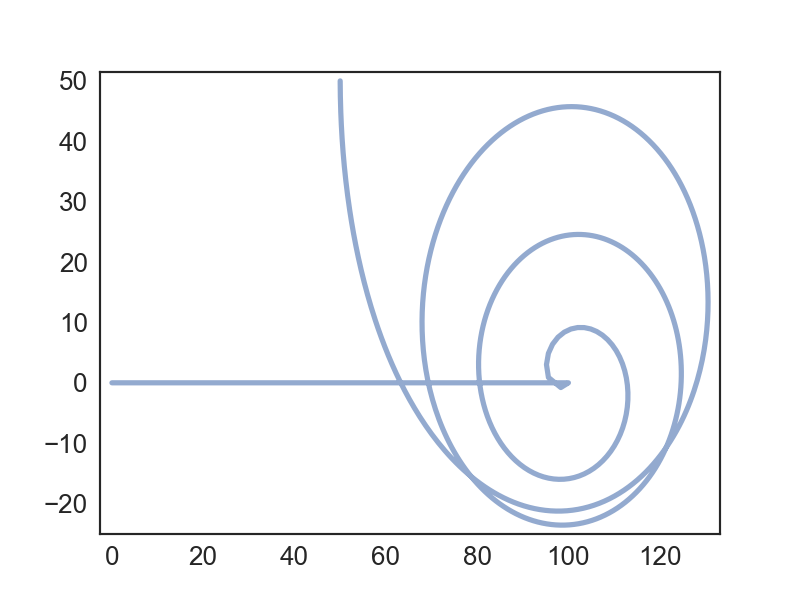

In [10]:
newfig()
plot(system.results.x_p1, system.results.y_p1)

<IPython.core.display.Javascript object>


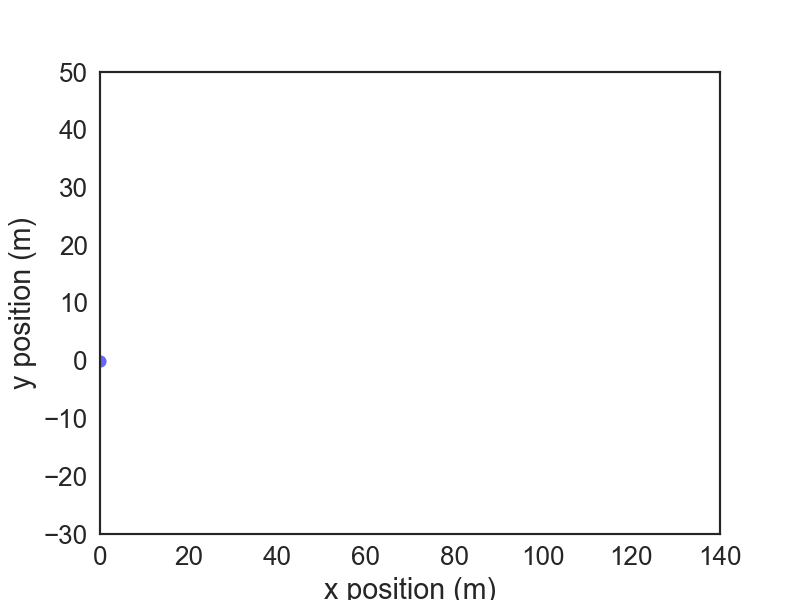

In [11]:
newfig()
decorate(xlabel='x position (m)',
         ylabel='y position (m)',
         xlim = [0, 140],
         ylim =[-30, 50],
         legend=False)
for x, y in zip(system.results.x_p1, system.results.y_p1):
    plot(x, y, 'bo', update=True)
    #sleep(0.00001)

In [86]:
v = Vector(1, 1)
v

<Quantity([1 1], 'dimensionless')>

In [39]:
a = type(v)
print(a)

NameError: name 'v' is not defined

In [40]:
v1 = v.mag * v

NameError: name 'v' is not defined

In [66]:
type(v1)

pint.unit.build_quantity_class.<locals>.Quantity

In [67]:
v1

<Quantity([ 1.41421356  1.41421356], 'dimensionless')>